In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/Dataset.csv")

In [ ]:
# Select the relevant columns for training
selected_columns = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
X = dataset[selected_columns].values
y = dataset['price'].values

# Encode categorical variables
label_encoder = LabelEncoder()
X[:, 0] = label_encoder.fit_transform(X[:, 0])
X[:, 1] = label_encoder.fit_transform(X[:, 1])
X[:, 2] = label_encoder.fit_transform(X[:, 2])
X[:, 4] = label_encoder.fit_transform(X[:, 4])

# One-hot encode categorical variables
column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), [0, 1, 2, 4])], remainder='passthrough')
X = column_transformer.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 17452554.117941197


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.7909377248559611


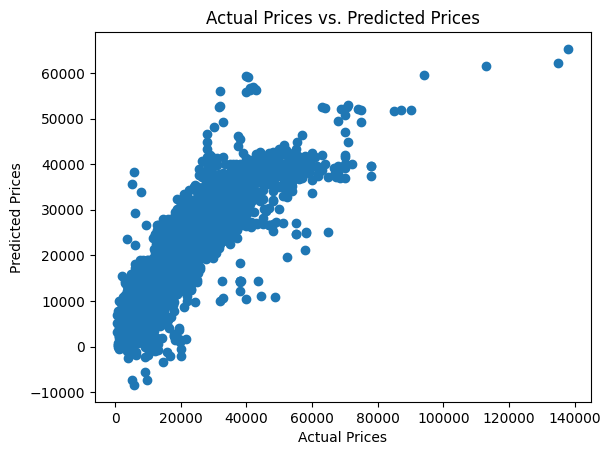

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()